# <img style="float: left; padding-right: 10px; width: 45px" src="iacs.png"> S-109A Introduction to Data Science: 

## Homework 2: Linear and k-NN Regression


**Harvard University**<br/>
**Summer 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">


### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

Names of people you have worked with goes here: 



<hr style="height:2pt">

In [147]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

<div class="theme"> Main Theme: Predicting Taxi Pickups in NYC </div>

In this homework, we will explore k-nearest neighbor and linear regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in the file `dataset_1.csv`.  You will need to separate it into training and test sets. The first column contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded in NYC during Jan 2015.

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric.

<div class="exercise"> <b> Question 1 [10 pts]</b> </div>

**1.1**. Use pandas to load the dataset from the csv file `dataset_1.csv` into a pandas data frame.  Use the `train_test_split` method from `sklearn` with a `random_state` of 42 and a `test_size` of 0.2 to split the dataset into training and test sets.  Store your train set dataframe in the variable `train_data`.  Store your test set dataframe in the variable `test_data`.


**1.2**. Generate a scatter plot of the training data points with well-chosen labels on the x and y axes. The time of the day should be on the x-axis and the number of taxi pickups on the y-axis.  Make sure to title your plot.

**1.3**. Does the pattern of taxi pickups make intuitive sense to you? 


### Answers

**1.1**

In [148]:

## Code here

#read file as dataframe
df = pd.read_csv('dataset_1.csv')
#seems like dataframe has no index but it was Timemin, so make a index
#make train, test data set by train_test_split function
train_data,test_data = train_test_split(df,random_state=42,test_size=0.2)
#train_data


**1.2**

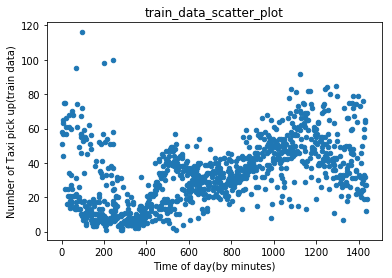

In [149]:
## Code for your plot here
#x,y axis name and tilte, label.
train_data.plot.scatter(x='TimeMin' ,y='PickupCount',  title ='train_data_scatter_plot')
plt.xlabel('Time of day(by minutes)')
plt.ylabel('Number of Taxi pick up(train data)')


**1.3**

**Does the pattern of taxi pickups make intuitive sense to you?**

   [Answer here]
   
   It has a pattern that looks like tilde.
   Start of this graph is a little bit spread out but slightly negative.
   From 200 Time to 1200 Time is positive linear relation with Time and Number of taxi.
   After then, it's roughly negative.
   
   It's becasue, 0~200, even 400 is mid night, so it has a variety of spread. 
   Probably party people are out there.
   And Start from 400~ 1200 is during the day time, rush hour, commuter time.
   

<div class="exercise"> <b>Question 2 [20 pts]</b> </div>

In lecture we've seen k-Nearest Neighbors (k-NN) Regression, a non-parametric regression technique.  In the following problems please use built-in functionality from `sklearn` to run k-NN Regression. 


**2.1**. Choose `TimeMin` as your predictor variable (aka, feature) and `PickupCount` as your response variable.  Create a dictionary of `KNeighborsRegressor` objects and call it `KNNModels`.  Let the key for your `KNNmodels` dictionary be the value of $k$ and the value be the corresponding `KNeighborsRegressor` object. For $k \in \{1, 10, 75, 250, 500, 750, 1000\}$, fit k-NN regressor models on the training set (`train_data`). 

**2.2**.  For each $k$ on the training set, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` with a scatter plot of predicted `PickupCount` vs `TimeMin`.  Do the same for the test set.  You should have one figure with 2 x 7 total subplots; for each $k$ the figure should have two subplots, one subplot for the training set and one for the test set. 

**Hints**:
1. In each subplot, use two different colors and/or markers to distinguish k-NN regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)


**2.3**. Report the $R^2$ score for the fitted models on both the training and test sets for each $k$.

**Hints**:
1. Reporting the $R^2$ values in tabular form is encouraged.
2. You should order your reported $R^2$ values by $k$.

**2.4**. Plot the $R^2$ values from the model on the training and test set as a function of $k$ on the same figure.  

**Hints**:
1. Again, the figure must have axis labels and a legend.
2. Differentiate $R^2$ visualization on the training and test set by color and/or marker.
3. Make sure the $k$ values are sorted before making your plot.

**2.5**. Discuss the results:

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
2. What does an $R^2$ score of $0$ mean?  
3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?
4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  
5. How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?
6. What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?

### Answers

**2.1**

In [150]:
## Code here

#we have to extract respones, predictor from tran_data and test_data
x_train = train_data.TimeMin.values.reshape(-1,1) # response variable y could be vector, but x has to be array
                                                #also series don't accept reshape, so get values and reshape it.
y_train =train_data.PickupCount
x_test = test_data.TimeMin.values.reshape(-1,1)
y_test = test_data.PickupCount

#The given K list.
K=[1,10,75,250,500,750,1000]
KNNModels = {}
# In for loop, make a dictionary
for i in K:
    data = KNeighborsRegressor(n_neighbors=i)
    data.fit(x_train,y_train)
    KNNModels[i] = data 


**2.2**

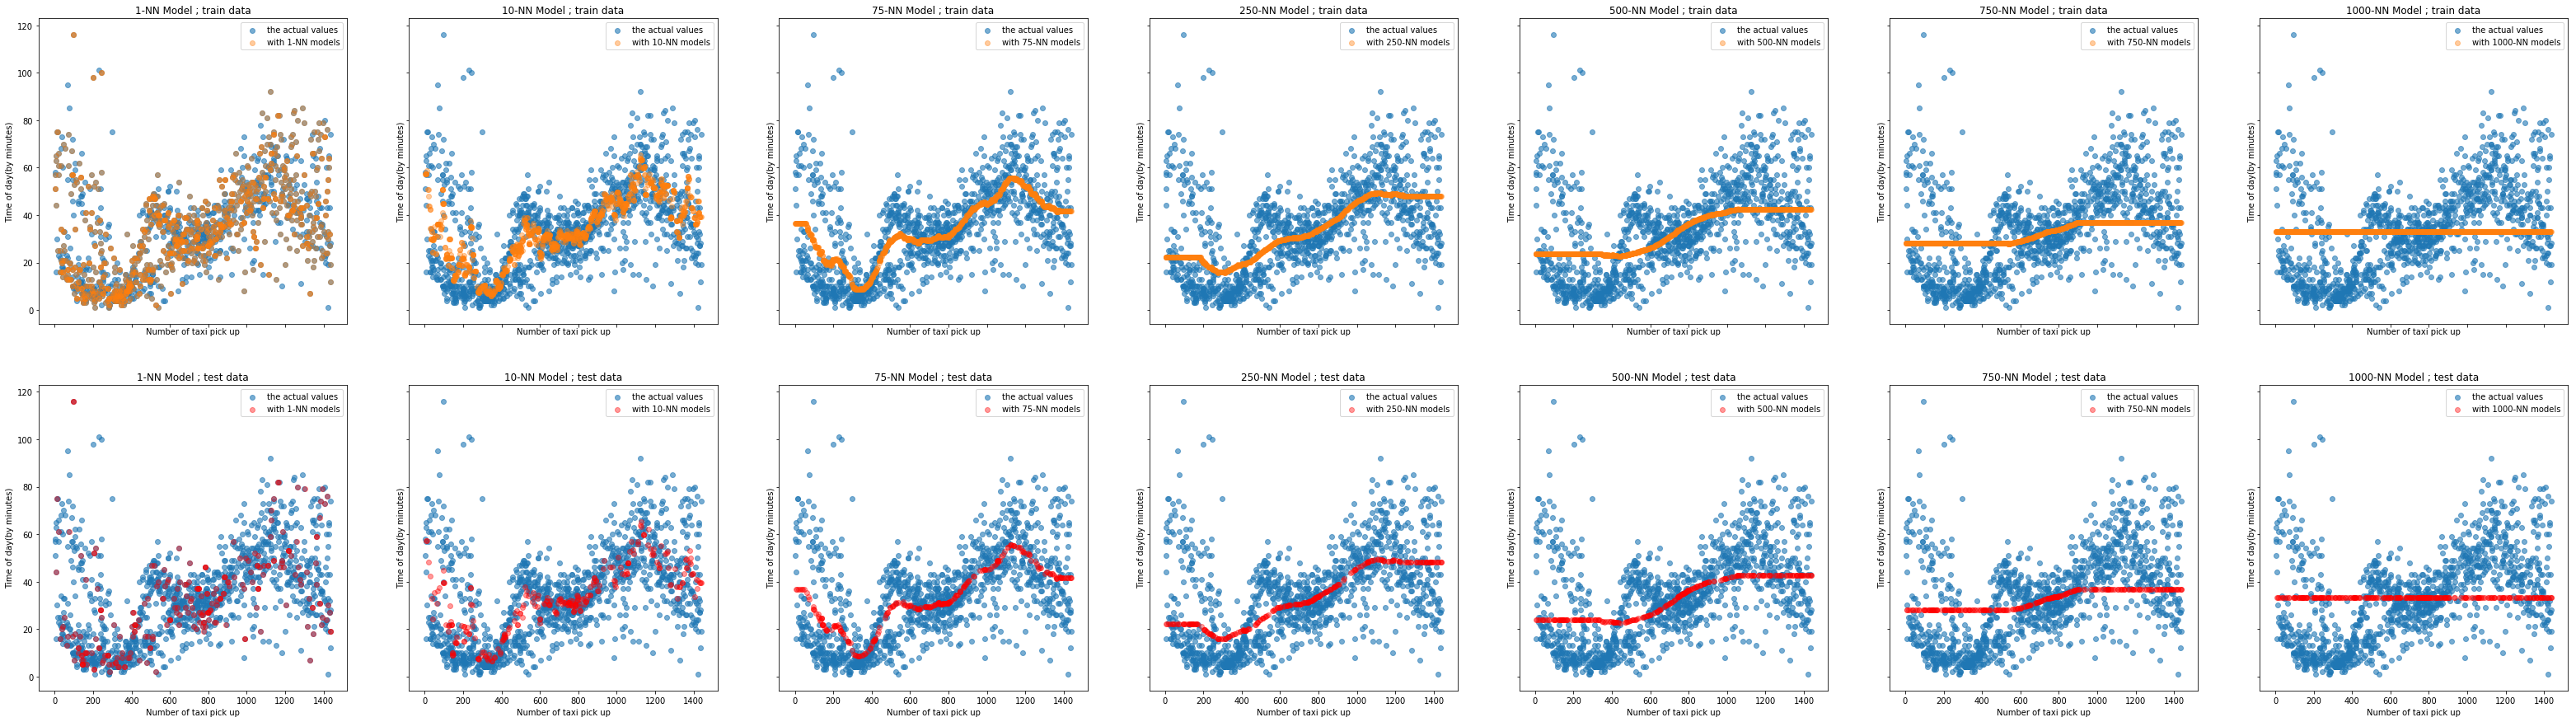

In [156]:
# define fig, ax as 2x7. And share x,y to make axis scale clean.
fig, ax = plt.subplots(2,7, figsize=(55,15), sharex=True, sharey=True)

# use enumerate for loop.
for i,k in enumerate(K):
    #Train data plots.
    #It is first line of graph ; 
    #Add subplot at i postion, i+1 ; because enumerate loop starts from 0.
    ax[0,i].scatter(df.TimeMin,df.PickupCount, alpha=0.6 , label="the actual values")  #make the actual data scatter plot.
    prediction = KNNModels[k].predict(x_train)
    ax[0,i].scatter(x_train,prediction, alpha=0.4 , label="with {0}-NN models".format(k)) #make train data prediction plot.
    ax[0,i].set_title("{0}-NN Model ; train data".format(k))
    ax[0,i].set(xlabel='Number of taxi pick up', ylabel='Time of day(by minutes)')
    ax[0,i].legend()
    
for i,k in enumerate(K):
    #Test data plots
    #Second line of plot array.
    ax[1,i].scatter(df.TimeMin,df.PickupCount, alpha=0.6 , label="the actual values") #Almost everything is same, but color = red
    prediction = KNNModels[k].predict(x_test)
    ax[1,i].scatter(x_test,prediction, alpha=0.4 , label="with {0}-NN models".format(k), color='r') 
    ax[1,i].set_title("{0}-NN Model ; test data".format(k))
    ax[1,i].set(xlabel='Number of taxi pick up', ylabel='Time of day(by minutes)')
    ax[1,i].legend()


**2.3**

In [132]:
## Code here

import pandas as pd
R_Score_train = {} #make a dictionary to arrange
for k in K:
    R = KNNModels[k].score(x_train,y_train) #each k's Rscore append in Dictionary
    R_Score_train[k] = R 

R_Score_test = {} #same as above but it is for test data's R score
for k in K:
    R = KNNModels[k].score(x_test,y_test) 
    R_Score_test[k] = R
    
#Now i have R_Score_Train data and R_Score_test data, so make a t
R_Score_Table = pd.DataFrame.from_dict(R_Score_train, orient='index', columns=["R_Score_train"])
R_Score_Table["R_Score_test"] = R_Score_test.values()
R_Score_Table.index.name = 'K-NN'  #index name
R_Score_Table #We have negative!?

,R_Score_train,R_Score_test
K-NN,,
1,0.712336,-0.418932
10,0.509825,0.272068
75,0.445392,0.390310
250,0.355314,0.340341
500,0.290327,0.270321
750,0.179434,0.164909
1000,0.000000,-0.000384


**2.4**

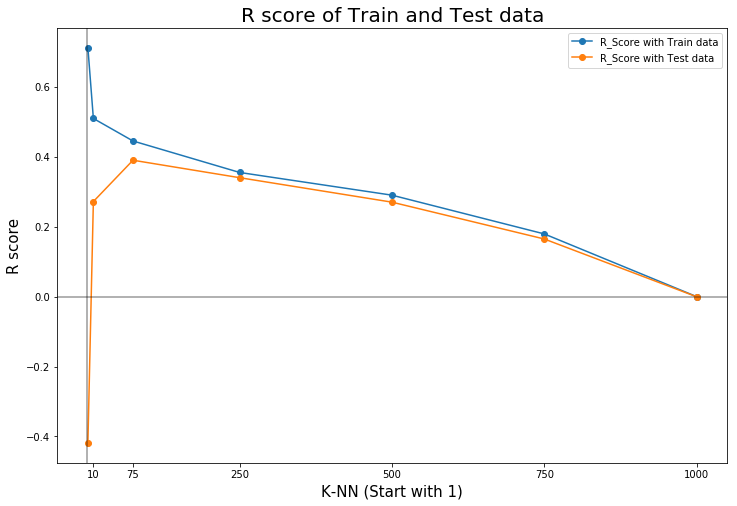

In [133]:
## Code for your plot here

#make a plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.set_xticks(K[1:])
ax.plot(K,R_Score_Table.R_Score_train,'o-', label="R_Score with Train data") #R_train data plot
ax.plot(K,R_Score_Table.R_Score_test,'o-', label="R_Score with Test data") #R_test data plot
ax.set_title("R score of Train and Test data", fontsize =20)
ax.set_xlabel("K-NN (Start with 1)", fontsize=15)
ax.set_ylabel("R score", fontsize=15)
ax.axhline(alpha =0.4, color='black') #make a axhine, axvline because we have negative value, so easy to check it.
ax.axvline(alpha =0.4, color='black')
ax.legend()

**2.5**

**Discuss the results**


1. *If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?*  



    [Answer here]
    
    I don't think it's good idea.  
    
    Because k-NN means that it will find the nearest observation in data.
    
    So it's going to be perfectly 'not' fit in the data set, and the output would be zero.
    
    simply, everything is your neighbor, it's impossible to find 'good fit' line.
    
2. *What does an $R^2$ score of $0$ mean?*



    [Answer here]
    
    As mentioned above, it has no 'good fit' line. 
    
    R score shows that linear relationship between two variables on a data. So 0 correlation in Regression data and 
    
    actual data.
    
3. *What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?*



    [Answer here]
    
    I have two negative R score in test data model.  
    
    Negative R score basically mean that the predict model does not follow trend of the data.
    
    However in this case, absoulte value of the negative R score is linear in my test's R group.
    
    So it apparently has some relationship, but negative i guess.
          
4. *Do the training and test $R^2$ plots exhibit different trends?  Describe.*  



    [Answer here]
    
    Trends is roughly similar. 
    
    The reason why is both of them are collected randomly in actual data as a sample.
    
    They has to have some similarity.
    
    But the test R2 plots has the negative values, 
    
    So it has some reversed trend in beginning.
         
5. *How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?*



    [Answer here]
    
    As it has higher k value, the fitted model goes Zero. Because when k is bigger, 
    
    the model finds more neighbor(k), so more smoothing graph.
    
    Eventually it will get too much under-fits line than high R score which is over-fitting.
    
6. *What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?*

    [Answer here]
    
    Both set has the best value when k is 10. 
    
    The value of R score is approximately 0.4 in that level.
    
    Beause if i choose 1 than 10, not only it might be overfitted in that point, 
    but the test set also have negative point. 
    
    So i would say 10 is the best value.
    
    

<div class="exercise"> <b> Question 3  [20 pts] </b></div>

We next consider simple linear regression for the same train-test data sets, which we know from lecture is a parametric approach for regression that assumes that the response variable has a linear relationship with the predictor.  Use the `statsmodels` module for Linear Regression. This module has built-in functions to summarize the results of regression and to compute confidence intervals for estimated regression parameters.  

**3.1**. Again choose `TimeMin` as your predictor variable and `PickupCount` as your response variable.  Create a `OLS` class instance and use it to fit a Linear Regression model on the training set (`train_data`).  Store your fitted model in the variable `OLSModel`.

**3.2**. Re-create your plot from 2.2 using the predictions from `OLSModel` on the training and test set. You should have one figure with two subplots, one subplot for the training set and one for the test set.

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)


**3.3**. Report the $R^2$ score for the fitted model on both the training and test sets.  You may notice something peculiar about how they compare.

**3.4**. Report the slope and intercept values for the fitted linear model.  

**3.5**. Report the $95\%$ confidence interval for the slope and intercept.

**3.6**. Create a scatter plot of the residuals ($e = y - \hat{y}$) of the linear regression model on the training set as a function of the predictor variable (i.e. `TimeMin`). Place on your plot a horizontal line denoting the constant zero residual.  

**3.7**. Discuss the results:

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?
2. What does the sign of the slope of the fitted linear model convey about the data?  
3. Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?  
4. Do you expect a $99\%$ confidence interval for the slope and intercept to be tighter or looser than the $95\%$ confidence intervals? Briefly explain your answer.  
5. Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.

### Answers

**3.1**

In [134]:
## Code here

#x_train and y_train is chosen as TimeMin and PickupCount, so reusable in this question.
X_train = sm.add_constant(x_train)

OLS_train = sm.OLS(y_train, X_train)
OLSModel_train = OLS_train.fit()

X_test= sm.add_constant(x_test)
OLS_test = sm.OLS(y_test, X_test)
OLSModel_test = OLS_test.fit()


**3.2**

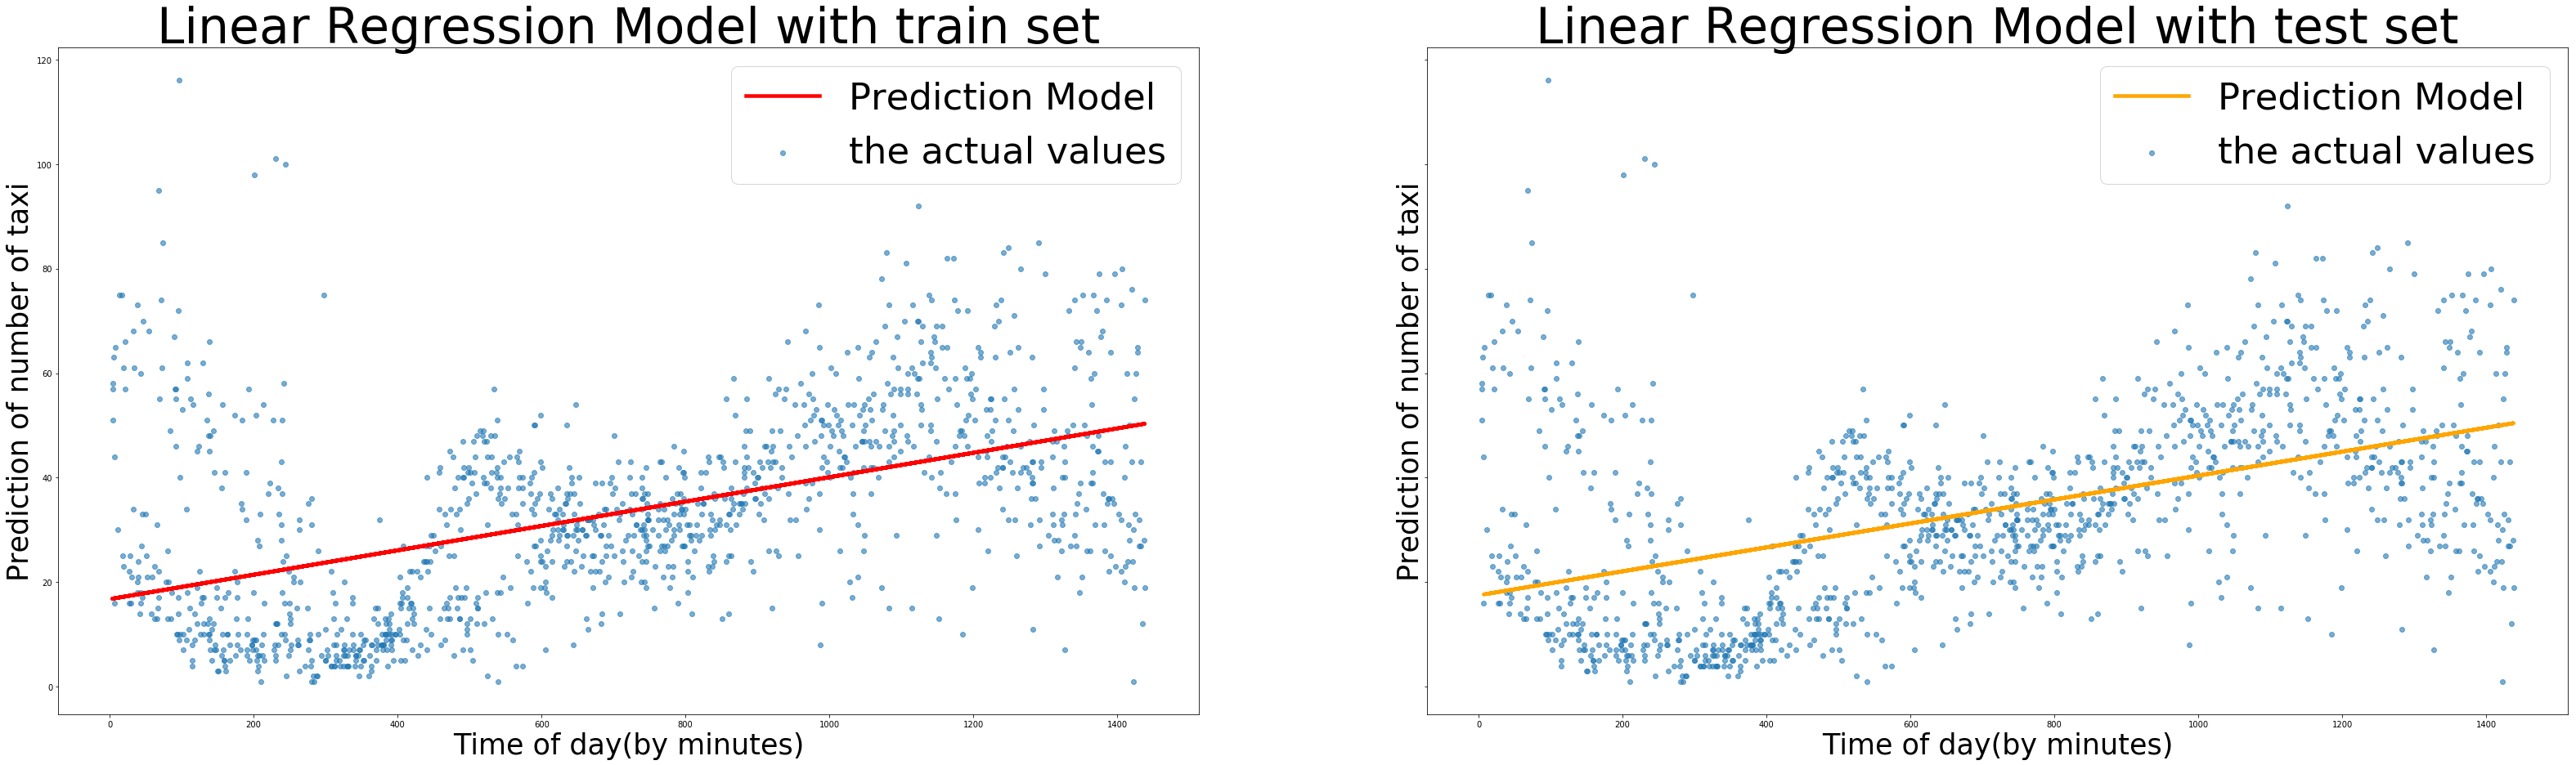

In [145]:
## Code for your plot here

    # define fig, ax as 2x7. And share x,y to make axis scale clean.
fig, ax = plt.subplots(1,2, figsize=(55,15), sharex=True, sharey=True)

ax[0].scatter(df.TimeMin,df.PickupCount, alpha=0.6 , label="the actual values")  #make the actual data scatter plot.
prediction = OLSModel_train.predict(X_train)  # It is OLSMOEL_train prediction
ax[0].plot(x_train,prediction, color='r',label="Prediction Model",lw=4.5)
ax[0].set_title("Linear Regression Model with train set", fontsize =60)
ax[0].set_xlabel("Time of day(by minutes)", fontsize=35)
ax[0].set_ylabel("Prediction of number of taxi", fontsize=35)
ax[0].legend(fontsize=45)

ax[1].scatter(df.TimeMin,df.PickupCount, alpha=0.6 , label="the actual values")  #make the actual data scatter plot.
prediction_test = OLSModel_test.predict(X_test)#It is OLSMOEL_test prediction
ax[1].plot(x_test,prediction_test,color='orange', label="Prediction Model",lw=4.5)
ax[1].set_title("Linear Regression Model with test set", fontsize =60)
ax[1].set_xlabel("Time of day(by minutes)", fontsize=35)
ax[1].set_ylabel("Prediction of number of taxi", fontsize=35)
ax[1].legend(fontsize=45)

**3.3**

In [136]:
## Code here

print("train data R score :{0}".format(OLSModel_train.rsquared))
print("test data R score :{0}".format(OLSModel_test.rsquared))


train data R score :0.2430260353189334
test data R score :0.24128118430708323


**3.4**

In [137]:
## Code here
print("train data coefficients")
print(OLSModel_train.params)
print("\n")
print("test data coefficients")
print(OLSModel_test.params)


train data coefficients
const    16.750601
x1        0.023335
dtype: float64


test data coefficients
const    17.493069
x1        0.022900
dtype: float64


**3.5**

In [138]:
## Code here
print("train data coefficients")
print(OLSModel_train.conf_int(alpha=0.05))
print("\n")
print("test data coefficients")
print(OLSModel_test.conf_int(alpha=0.05))


train data coefficients
               0          1
const  14.675141  18.826062
x1      0.020777   0.025893


test data coefficients
               0          1
const  13.379657  21.606481
x1      0.017821   0.027979


**3.6**

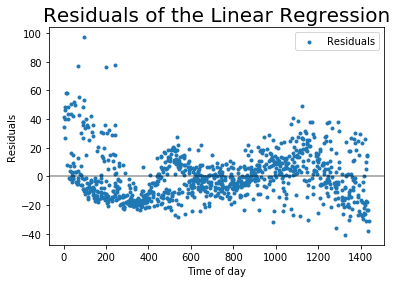

In [139]:
## Code here

plt.scatter(x_train,OLSModel_train.resid, s=9, label="Residuals")
plt.axhline(color='black', alpha=0.4)
plt.xlabel("Time of day")
plt.ylabel("Residuals")
plt.title("Residuals of the Linear Regression", fontsize=20)
plt.legend()

**3.7**

**Discuss the results**

1. *How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?*

    [Answer here]
    
    Linear Regression's R score is lower than K-NN regression. 
    It is becasue K-NN is basd on non-parametic statistic method.
    Which means it does not care about linear relationship.
    Parametic statistic Linear Regression assumes a linear functional form f(x).
    This data set has hardly linear relationship. 
    
    

2. *What does the sign of the slope of the fitted linear model convey about the data?* 

    [Answer here]
    
    In this fitted linear model has significant small slope, roughly 0.02.
    That conveys this data's linear relation between X and Y is relatively weak.


3. *Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?*  
    
    [Answer here]
    
    I don't think it is reliable. Due to too small difference between confidence interval and the model.
    It is small chance of obtain observation in this big data set.


4. *Do you expect a $99\%$ confidence interval for the slope and intercept to be tighter or looser than the $95\%$ confidence intervals? Briefly explain your answer.*  

    [Answer here]
    
    It is going to be wider than 95%. Because 99% means we are 99% sure the predict data is in interval.
    More accurancy we will get.
    

5. *Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.*

    [Answer here]
    
    It is not acceptable in this data. Because the residuals plot also does not have high linear relation.
    They vary as actual data. It does not mean the Linear Model predict well.
    And as you can see, the scatter plot's distribution looks like tilde. Not linear line.


<div class="exercise">  <b> Question 4 [20 pts]: Roll Up Your Sleeves Show Some Class </b> </div>

We've seen Simple Linear Regression in action and we hope that you're convinced it works.  In lecture we've thought about the mathematical basis for Simple Linear Regression.  There's no reason that we can't take advantage of our knowledge to create our own implementation of Simple Linear Regression.  We'll provide a bit of a boost by giving you some basic infrastructure to use.  In the last problem, you should have heavily taken advantage of the `statsmodels` module.  In this problem we're going to build our own machinery for creating Linear Regression models and in doing so we'll follow the `statsmodels` API pretty closely.  Because we're following the `statmodels` API, we'll need to use python classes to create our implementation.  If you're not familiar with python classes don't be alarmed.  Just implement the requested functions/methods in the CS109OLS class that we've given you below and everything should just work.  If you have any questions, ask the teaching staff.

**4.1**. Implement the `fit` and `predict` methods in the CS109OLS class we've given you below as well as the `CS109r2score` function that we've provided outside the class.

**Hints**:

1. `fit` should take the provided numpy arrays `endog` and `exog` and use the normal equations to calculate the optimal linear regression coefficients.  Store those coefficients in self.params
2. In `fit` you'll need to calculate an inverse.  Use np.linalg.pinv
3. `predict` should use the numpy array stored in self.exog and calculate an np.array of predicted values.
4. `CS109r2score` should take the true values of the response variable `y_true` and the predicted values of the response variable `y_pred` and calculate and return the $R^2$ score. 
5.  To replicate the statsmodel API your code should be able to be called as follows:
    ```python
    mymodel = CS109OLS(y_data, augmented_x_data)
    mymodel.fit()
    predictions = mymodel.predict()
    R2score = CS109r2score(true_values, predictions)
    ```

**4.2**. As in 3.1 create a `CS109OLS` class instance and  fit a Linear Regression model on the training set (`train_data`).  Store your model in the variable `CS109OLSModel`.  Remember that as with sm.OLS your class should assume you want to fit an intercept as part of your linear model (so you may need to add a constant column to your predictors).

**4.3**  As in 3.2 Overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` on the training set with a scatter plot of `PickupCount` vs predictions of `TimeMin` from your `CS109OLSModel` Linear Regression model on the training set.  Do the same for the test set.  You should have one figure with two subplots, one subplot for the training set and one for the test set.  How does your figure compare to that in 3.2?

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)

**4.4**. As in 3.3, report the $R^2$ score for the fitted model on both the training and test sets using your `CS109OLSModel`.  Make sure to use the `CS109r2score` that you created.  How do the results compare to the the scores in 3.3?

**4.5**. as in 3.4, report the slope and intercept values for the fitted linear model your `CS109OLSModel`.   How do the results compare to the the values in 3.4?




### Answers

**4.1**

In [140]:
class CS109OLS(object):
    
    def __init__(self, endog = [], exog = []):
        
        ## Make sure you initialize self.params
        self.params = []
              
        ## store exog and endog in instance variables
        self.endog = np.array(endog)
        self.exog = np.array(exog)
  
                    
    def fit(self):
        
        #################
        # Your Code below
        #################
        
        # do something with self.exog and self.endog to calculate 
        # your linear regression coefficients
        # store the result in self.params
        
        #use normal equation ; Beta_hat = (X^T * X)^-1 *X^T * y
        
        X = self.exog
        XT = np.transpose(X) #X^T
        XTX=XT.dot(X) #X^T * X
        XTX_inv = np.linalg.pinv(XTX) # (X^T * X)^-1
        
        Beta_1 = XTX_inv.dot(XT).dot(self.endog)    #eventually (X^T * X)^-1 *X^T * y
        
        self.params.append(Beta_1) #put in the self.params

        
        return self
            
    def predict(self):
        
        # check if the linear regression coefficients have been calculated
        if not np.array(self.params).size:
            raise(Exception("fit() has not been called on OLS Model!"))
        
        #################
        # Your Code below
        #################
        
        
        #Y=B1X is predictions.
        
        return self.params[0]*self.exog
        # calculate your predictions based upon exog/self.exog and return them
        # as a numpy array
                  
            
    def params(self): #make new method to print params.
        return self.params[0]
        
def CS109r2score(y_true, y_pred):
    
    #################
    # Your Code below
    #################
    
    #R^2 = basic equatuin.
    numerator = np.sum((y_pred - np.mean(y_true))**2) #numerator
    denominator = np.sum((y_true - np.mean(y_true))**2) #denominator
    return numerator/denominator #divide
    # y_true should be your actual y data (endogenous data)
    # y_pred should be the corresponding predictions from your model
    
    # calculate the r^2 score an return it
    


In [141]:
#test above function
mymodel = CS109OLS(y_train,x_train)
mymodel.fit()
predictions = mymodel.predict()
R2score = CS109r2score(y_train, predictions)
R2score

0.80594490240968431

**4.2**

In [142]:
## Code here

#I will use train set i made, it has done reshape(-1,1).
CS109OLSModel = CS109OLS(y_train,x_train)
CS109OLSModel.fit()

CS109OLSModel_test = CS109OLS(y_test,x_test)
CS109OLSModel_test.fit()
#make model and fit


**4.3**

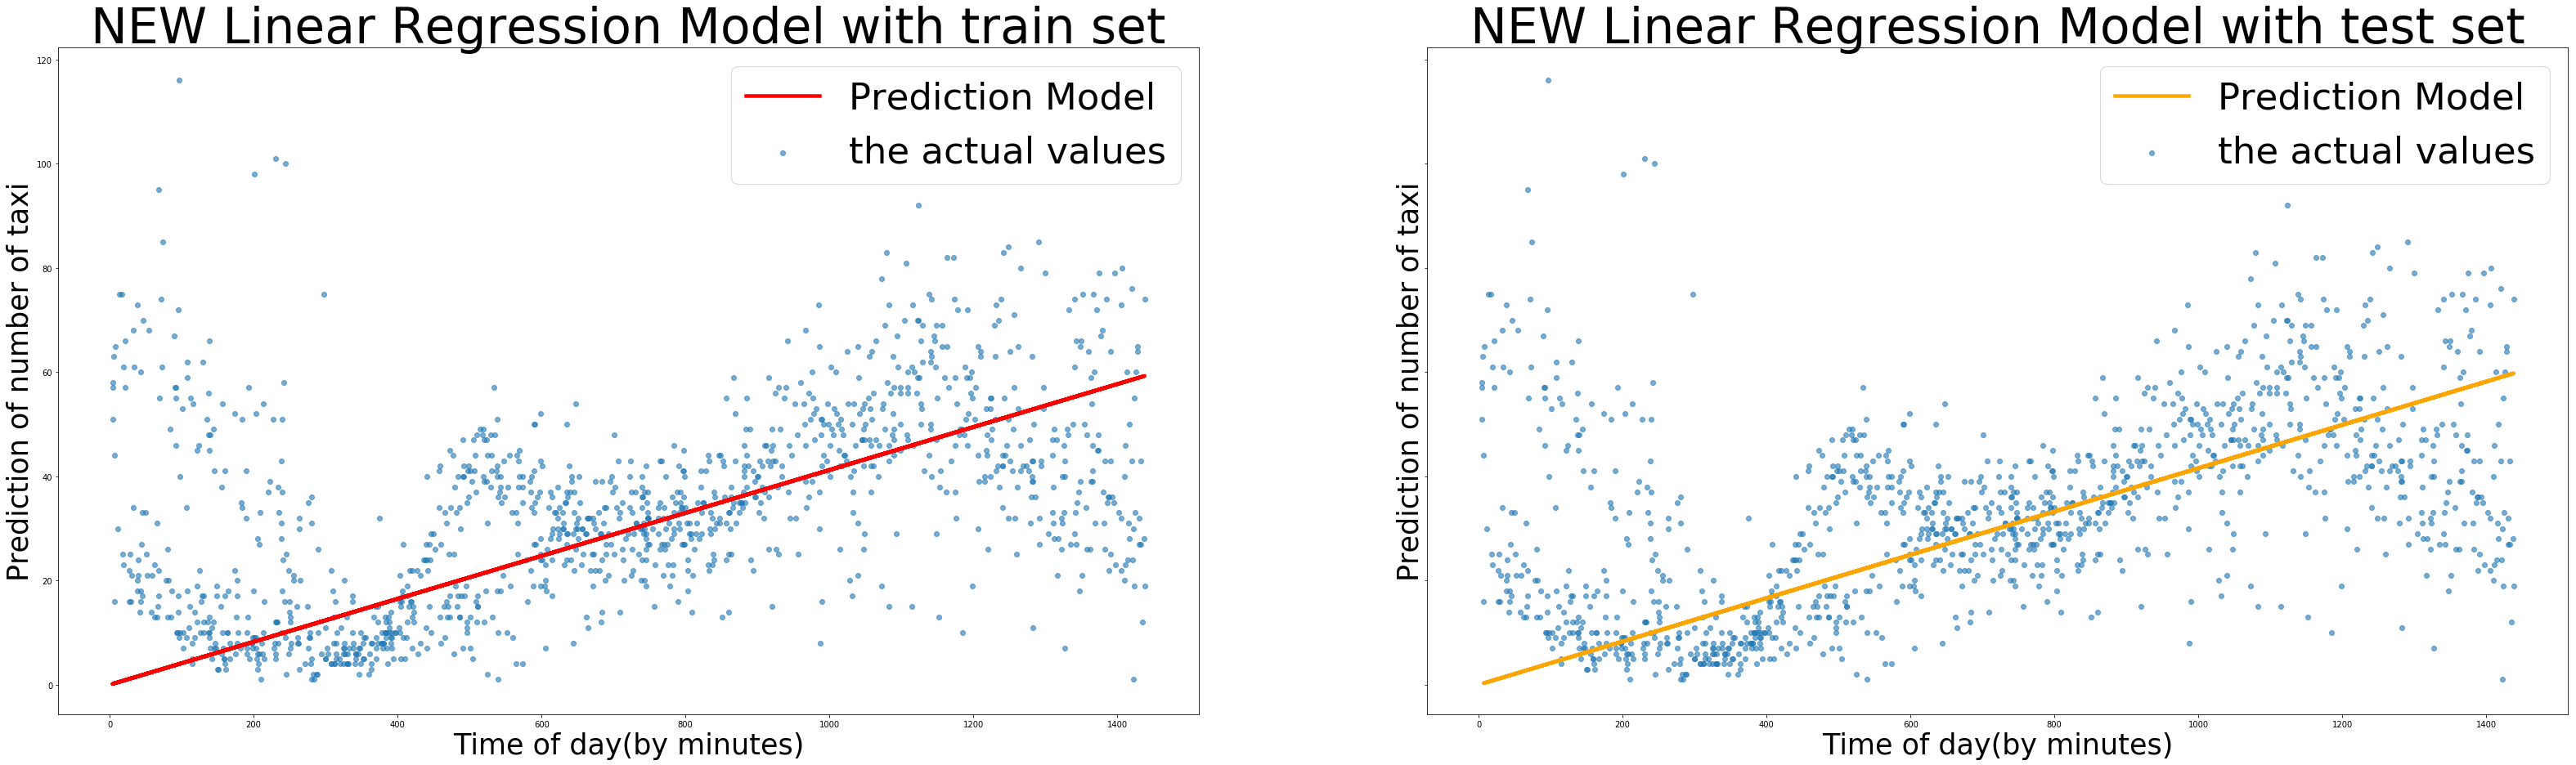

In [143]:
## Code for your plot here
# create figure
fig, ax = plt.subplots(1,2, figsize=(55,15), sharex=True, sharey=True)

ax[0].scatter(df.TimeMin,df.PickupCount, alpha=0.6 , label="the actual values")  #make the actual data scatter plot.
prediction = CS109OLSModel.predict()  # It is my new CS109OLSMODEL prediction with train set
ax[0].plot(x_train,prediction, color='r',label="Prediction Model",lw=4.5)
ax[0].set_title("NEW Linear Regression Model with train set", fontsize =60)
ax[0].set_xlabel("Time of day(by minutes)", fontsize=35)
ax[0].set_ylabel("Prediction of number of taxi", fontsize=35)
ax[0].legend(fontsize=45)

ax[1].scatter(df.TimeMin,df.PickupCount, alpha=0.6 , label="the actual values")  #make the actual data scatter plot.
prediction_test = CS109OLSModel_test.predict()   # It is my new CS109OLSMODEL prediction with test set
ax[1].plot(x_test,prediction_test,color='orange', label="Prediction Model",lw=4.5)
ax[1].set_title("NEW Linear Regression Model with test set", fontsize =60)
ax[1].set_xlabel("Time of day(by minutes)", fontsize=35)
ax[1].set_ylabel("Prediction of number of taxi", fontsize=35)
ax[1].legend(fontsize=45)
fig.savefig("filename.png")


#roughly higher slope than before.

**4.4**

In [19]:
## Code here

train_R2score = CS109r2score(y_train, CS109OLSModel.predict())
test_R2score = CS109r2score(y_test , CS109OLSModel_test.predict())

print("train_R2score")
print(train_R2score)
print("\n")
print("test_R2score")
print(test_R2score)


#Both R scores are higher than QW3. Because we did not consider intercept,
#And just use Y = B1 * X linear normal equation.
#Apparently original OLS predict function considers a B0 or epsilon value.

train_R2score
0.80594490241


test_R2score
0.84940653467


**4.5**

In [20]:
## Code here

CS109OLSModel.params

#slope is 0.04 , intercept is 0.
#Because this model considers intercept as a fitted model. start from 0.

[array([ 0.0412267])]

<div class="exercise"><b> Question 5 </b></div>.

You may recall from lectures that OLS Linear Regression can be susceptible to outliers in the data.  We're going to look at a dataset that includes some outliers and get a sense for how that affects modeling data with Linear Regression.


**5.1**. We've provided you with two files `outliers_train.csv` and `outliers_test.csv` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data?

**5.2**. Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create a Linear Regression model on the training set data.  Store your model in the variable `OutlierOLSModel`.

**5.3**. You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure ahead of time of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?  

**5.4**  In CS109 we're strong believers that creating heuristic models is a great way to build intuition. In that spirit, construct an approximate algorithm to find the 3 outlier candidates in the training data by taking advantage of the Linear Regression residuals. Place your algorithm in the function `find_outliers_simple`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  The return value should be a list `outlier_indices` representing the indices of the outliers in the original datasets you passed in.  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeSimpleModel`.

**Hint:** 
    1. What measure might you use to compare the performance of different Linear Regression models?

**5.5** Create a figure with two subplots.  In one subplot include a visualization of the Linear Regression line from the full training set overlayed on the test set data in `outliers_test`.  In the other subplot include a visualization of the Linear Regression line from the training set data with outliers removed overlayed on the test set data in `outliers_test`.  Visually which model fits the test set data more closely?

**5.6**. Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?

**5.7**. One potential problem with the brute force outlier detection approach in 5.3 and the heuristic algorithm constructed in 5.4 is that they assume prior knowledge of the number of outliers.  In general we can't expect to know ahead of time the number of outliers in our dataset.  Alter the algorithm you constructed in 5.4 to create a more general heuristic (i.e. one which doesn't presuppose the number of outliers) for finding outliers in your dataset.  Store your algorithm in the function `find_outliers_general`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  It can take additional parameters as long as they have default values set.  The return value should be the list `outlier_indices` representing the indices of the outliers in the original datasets you passed in (in the order that your algorithm found them).  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeGeneralModel`.

**Hints**:
   1. How many outliers should you try to identify in each step? (i.e. is there any reason not to try to identify one outlier at a time)
   2. If you plotted an $R^2$ score for each step the algorithm, what might that plot tell you about stopping conditions?
   3. As mentioned earlier we don't know ahead of time how many outliers to expect in the dataset or know mathematically  how we'd define a point as an outlier.  For this general algorithm, whatever measure you use to determine a point's impact on the Linear Regression model (e.g. difference in R^2, size of the residual or maybe some other measure) you may want to determine a tolerance level for that measure at every step below which your algorithm stops looking for outliers.
   4. You may also consider the maximum possible number of outliers it's reasonable for a dataset of size $n$ to have and use that as a cap for the total number of outliers identified (i.e. would it reasonable to expect all but one point in the dataset to be an outlier?)
    
**5.8**. Run your algorithm in 5.7 on the training set data.  

   1. What outliers does it identify?
   2. How do those outliers compare to the outliers you found in 5.4?
   3. How does the general outlier-free Linear Regression model you created in 5.7 perform compared to the simple one in 5.4?

### Answers

**5.1**

*What does a visual inspection of training set tell you about the existence of outliers in the data?*
  
    [Answer here]
    
    Before making a plot or graph, i think it is hard to tell whether there is the existence
    of outliers in the data.
    Just we can guess it has -2<x<2   and -300<y<300
    But last line has pretty heterogeneous 3 values.
    It might be outliers.
    


**5.2**. Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create a Linear Regression model on the training set data.  Store your model in the variable `OutlierOLSModel`.


In [21]:
## Code here
df = pd.read_csv("outliers_train.csv")
#make OLS model
OutlierOLSModel = sm.OLS(df.Y, df.X).fit()

,X,Y
0,-0.773019,-219.103753
1,-0.394034,-334.859357
2,0.630360,-16.232549
3,-0.350418,-179.034618
4,-1.491328,-109.710316
5,-0.119129,-250.992560
6,-1.742547,-15.976455
7,1.085502,243.835916
8,-0.318393,78.936128
9,-1.469421,-207.045450


**5.3**

*You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure ahead of time of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?*
  
    Answer here


You have to find all probablites of whether the outliers are in the your Linear Model.
All possible subsets is i think $2^3$

Ex) probablilty of each outliers XXX ; X has 2 options but 3 times, whether an outlier exist or not.
    $2^3$

**5.4** In CS109 we're strong believers that creating heuristic models is a great way to build intuition. In that spirit, construct an approximate algorithm to find the 3 outlier candidates in the training data by taking advantage of the Linear Regression residuals. Place your algorithm in the function find_outliers_simple. It should take the parameters dataset_x and dataset_y representing your features and response variable values (make sure your response variable is stored as a numpy column vector). The return value should be a list outlier_indices representing the indices of the outliers in the original datasets you passed in. Remove the outliers that your algorithm identified, use statsmodels to create a Linear Regression model on the remaining training set data, and store your model in the variable OutlierFreeSimpleModel.

In [44]:
## Code here
def find_outliers_simple(dataset_x , dataset_y):
        Model = sm.OLS(dataset_x.values, dataset_y.values)
        data = Model.fit()
        residual = abs(data.resid) #find outliers by comparing absoulte values.
        outlier_indices = np.argsort(residual)[-3:] #we know 3 outliers in the data. just pick bigges 3.
        return outlier_indices

find_outliers_simple(df.X,df.Y)

OutlierFreeSimpleModel = sm.OLS(df.Y[:50], df.X[:50]).fit()


[52 51 50]


**5.5** Create a figure with two subplots.  In one subplot include a visualization of the Linear Regression line from the full training set overlayed on the test set data in `outliers_test`.  In the other subplot include a visualization of the Linear Regression line from the training set data with outliers removed overlayed on the test set data in `outliers_test`.  Visually which model fits the test set data more closely?

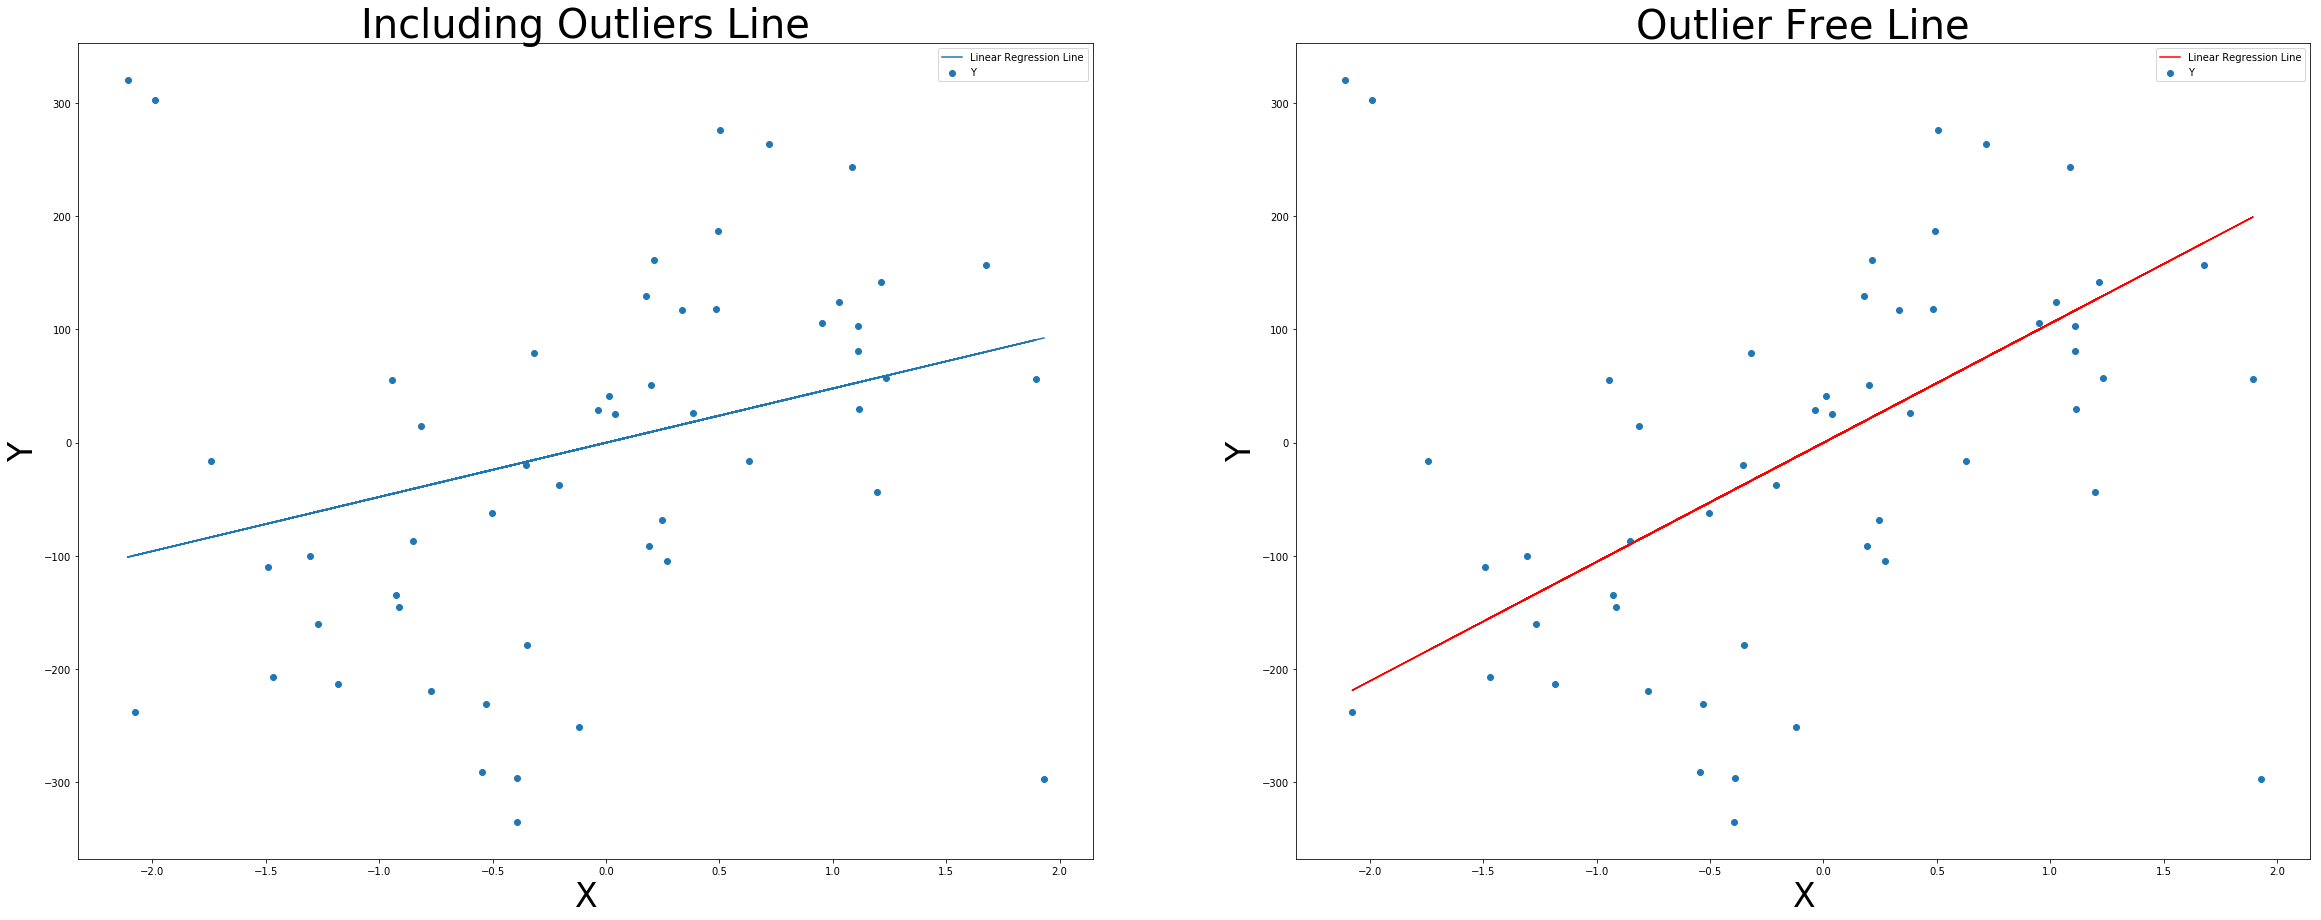

In [25]:
## Code for your plot here

fig, ax = plt.subplots(1,2, figsize=(40,15), sharex=True)


#make scatter plot of actual data(training)
ax[0].scatter(df.X,df.Y)
#make plot of Linear Regression Model with outlier
ax[0].plot(df.X,OutlierOLSModel.predict(df.X), label="Linear Regression Line")
ax[0].set_title("Including Outliers Line", fontsize=40)
ax[0].set_xlabel('X', fontsize=33)
ax[0].set_ylabel('Y', fontsize=33)
ax[0].legend()



ax[1].scatter(df.X,df.Y)
#make plot of Linear Regression Model without outlier
ax[1].plot(df.X[:50],OutlierFreeSimpleModel.predict(df.X[:50]),color='r', label="Linear Regression Line")
ax[1].set_title("Outlier Free Line", fontsize=40)
ax[1].set_xlabel('X', fontsize=33)
ax[1].set_ylabel('Y', fontsize=33)
ax[1].legend()


#It seems like outlier free line is closer than before.
#Probably 

**5.6**. Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?

In [26]:
## Code here
print("Outlier including model R&2 :{0}".format(OutlierOLSModel.rsquared))
print("\n")
print("Outlier free model R&2 :{0}".format(OutlierFreeSimpleModel.rsquared))

#Of course outlier free model has a better R^2 Score due to we remove outliers!
#That means less variety than before; more fitted.

Outlier including model R&2 :0.08601322292292757


Outlier free model R&2 :0.4004735972897352


**5.7**. One potential problem with the brute force outlier detection approach in 5.3 and the heuristic algorithm constructed in 5.4 is that they assume prior knowledge of the number of outliers.  In general we can't expect to know ahead of time the number of outliers in our dataset.  Alter the algorithm you constructed in 5.4 to create a more general heuristic (i.e. one which doesn't presuppose the number of outliers) for finding outliers in your dataset.  Store your algorithm in the function `find_outliers_general`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  It can take additional parameters as long as they have default values set.  The return value should be the list `outlier_indices` representing the indices of the outliers in the original datasets you passed in (in the order that your algorithm found them).  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeGeneralModel`.

**Hints**:
   1. How many outliers should you try to identify in each step? (i.e. is there any reason not to try to identify one outlier at a time)
   2. If you plotted an $R^2$ score for each step the algorithm, what might that plot tell you about stopping conditions?
   3. As mentioned earlier we don't know ahead of time how many outliers to expect in the dataset or know mathematically  how we'd define a point as an outlier.  For this general algorithm, whatever measure you use to determine a point's impact on the Linear Regression model (e.g. difference in R^2, size of the residual or maybe some other measure) you may want to determine a tolerance level for that measure at every step below which your algorithm stops looking for outliers.
   4. You may also consider the maximum possible number of outliers it's reasonable for a dataset of size $n$ to have and use that as a cap for the total number of outliers identified (i.e. would it reasonable to expect all but one point in the dataset to be an outlier?)

In [124]:
## Code here

def find_outliers_general(dataset_x =[] , dataset_y =[]):
    Model = sm.OLS(dataset_x.values, dataset_y.values)
    data = Model.fit()
    #make residual list to find outliers.
    residual = data.resid
    std = np.std(residual)
    #i define outlier as more than 2 standard deviation.
    outlier_indices = np.argwhere(abs(residual)>2*std)
    return outlier_indices

index = find_outliers_general(df.X,df.Y)
print(index)#check index ; 50,51,52
remove_df = df.drop([50,51,52]) #remove it in the data set

OutlierFreeGeneralModel = sm.OLS(remove_df.Y,remove_df.X).fit()


[[50]
 [51]
 [52]]


**5.8**

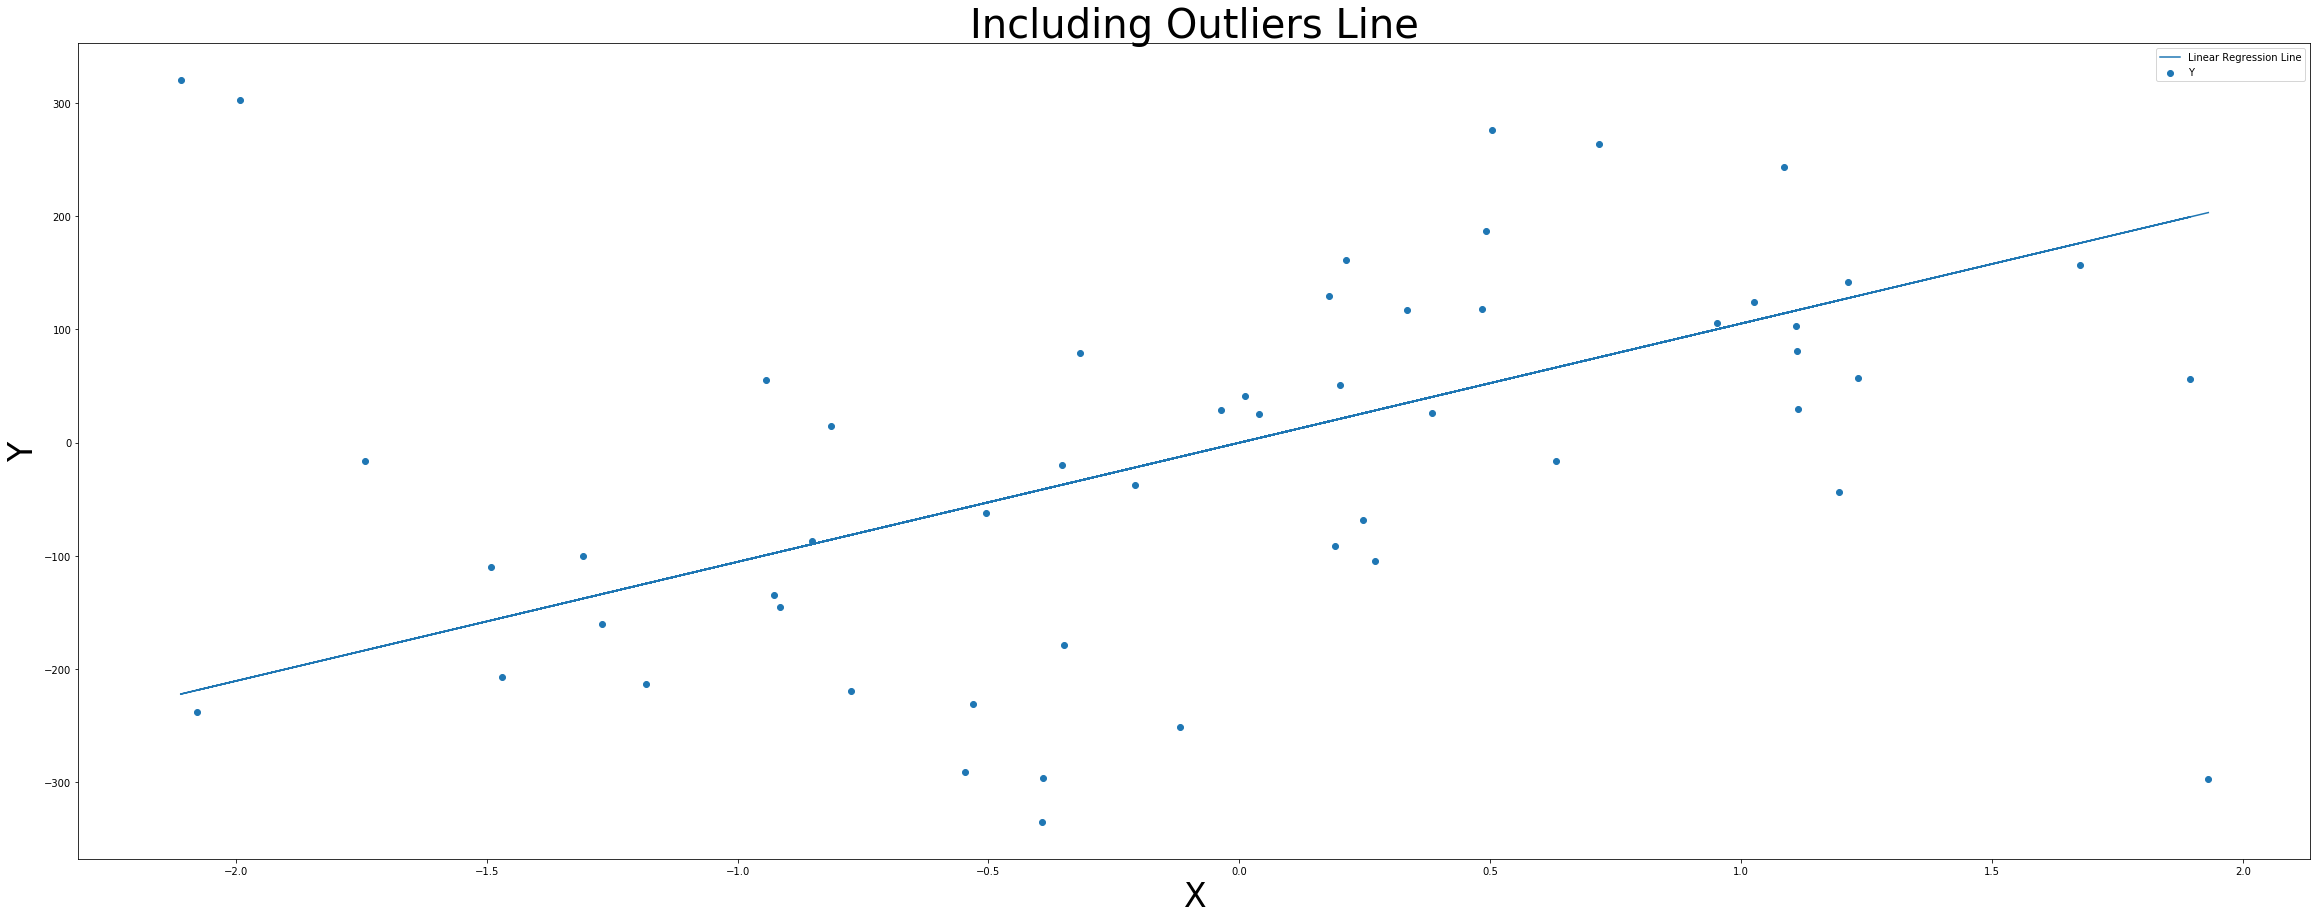

In [125]:
## Code here

fig, ax = plt.subplots(1,1, figsize=(40,15))

#make scatter plot of actual data(training)
ax.scatter(df.X,df.Y)
#make plot of Linear Regression Model with outlier
ax.plot(df.X,OutlierFreeGeneralModel.predict(df.X), label="Linear Regression Line")
ax.set_title("Including Outliers Line", fontsize=40)
ax.set_xlabel('X', fontsize=33)
ax.set_ylabel('Y', fontsize=33)
ax.legend()

**5.8**. Run your algorithm in 5.7 on the training set data.  


1. *What outliers does it identify?*
    
    [Answer here]
    
    I just put +- 2 standard deviation to identify outliers. 
    Question was quiet vague in terms of finding outliers. 
    My algorithm is not sort of for loop process to indentify outliers due to effectiveness.
    If use for loop to find it and delete and check R^2 each time, 
    it may probably be bad algorithm, personally.
    
    
2. *How do those outliers compare to the outliers you found in 5.4?*
    
    [Answer here]
    
    It is same, mentioned above, i define outliers as out range of +-2 standard deviation.
    There are 3 outliers that corresponding my definition. Same as 5.4
    
    
3. *How does the general outlier-free Linear Regression model you created in 5.7 perform compared to the simple one in 5.4?*

    [Answer here]
    
    It also same because Regression model depends on X,Y values. 
    That is why the fixed(remove outlier) model is exactly same as 5.4 model.
    

---- 


In [1]:
from IPython.core.display import HTML
def css_styling(): styles = open("cs109.css", "r").read(); return HTML(styles)
css_styling()